In [ ]:
import tensorflow as tf


we import mnist as it is a dataset which contains the handwritten digits

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


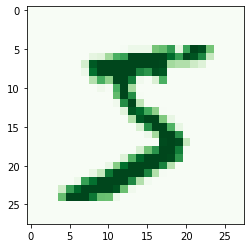

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap = 'Greens')
plt.show()

In [ ]:
y_train[0]

5

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
!pip install tensorflow.keras.utils

ERROR: Could not find a version that satisfies the requirement tensorflow.keras.utils (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.utils


In [ ]:
import tensorflow

y_train_encoded = tensorflow.keras.utils.to_categorical(y_train)
y_test_encoded = tensorflow.keras.utils.to_categorical(y_test)

In [ ]:
print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [ ]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [ ]:

print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [ ]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print('mean: ', x_mean)
print('std: ', x_std)

mean:  33.318421449829934
std:  78.56748998339798


In [ ]:
epsilon = 1e-10
#we are using episolon so as to avoid any instability due to x_std
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

In [ ]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=128, activation = 'relu', input_dim=784,kernel_initializer='he_uniform'))
model.add(Dense(units=128, activation = 'relu',kernel_initializer='he_normal'))
model.add(Dense(units=10, activation = 'softmax',kernel_initializer='normal'))


In [ ]:
model.compile(optimizer = 'sgd',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h = model.fit( x_train_norm,y_train_encoded,epochs = 5,validation_split=0.33,batch_size=10)

Epoch 1/5
4020/4020 [==============================] - 7s 2ms/step - loss: 0.3186 - accuracy: 0.9041 - val_loss: 0.1883 - val_accuracy: 0.9436
Epoch 2/5
4020/4020 [==============================] - 7s 2ms/step - loss: 0.1428 - accuracy: 0.9579 - val_loss: 0.1519 - val_accuracy: 0.9533
Epoch 3/5
4020/4020 [==============================] - 8s 2ms/step - loss: 0.0976 - accuracy: 0.9707 - val_loss: 0.1242 - val_accuracy: 0.9631
Epoch 4/5
4020/4020 [==============================] - 8s 2ms/step - loss: 0.0708 - accuracy: 0.9789 - val_loss: 0.1118 - val_accuracy: 0.9671
Epoch 5/5
4020/4020 [==============================] - 8s 2ms/step - loss: 0.0548 - accuracy: 0.9842 - val_loss: 0.1101 - val_accuracy: 0.9667


In [ ]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.0871 - accuracy: 0.9713
test set accuracy:  97.13000059127808


In [ ]:
y_pred = model.predict(x_test_norm)
print('shape of predictions: ', y_pred.shape)

shape of predictions:  (10000, 10)


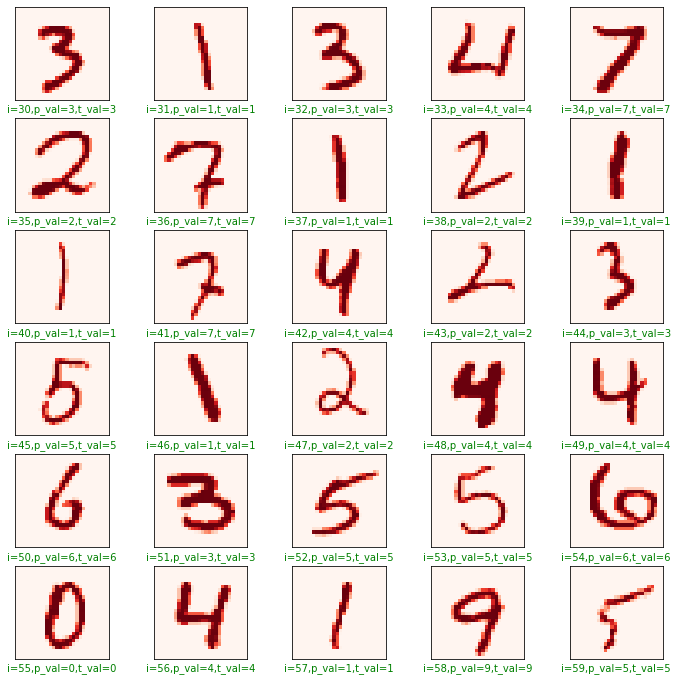

In [ ]:
plt.figure(figsize = (12, 12))
t=0
for i in range(30,60):
    plt.subplot(6, 5, t + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    col = 'g'
    if np.argmax(y_pred[i])!= np.argmax(y_test_encoded[i]):
        col = 'r'
    plt.xlabel('i={},p_val={},t_val={}'.format(i, np.argmax(y_pred[i]),np.argmax(y_test_encoded[i]) ), color = col)
    plt.imshow(x_test[i], cmap='Reds')
    t=t+1
plt.show()

